In [1]:
import numpy as np #operaciones matriciales y con vectores
import pandas as pd #tratamiento de datos
import matplotlib.pyplot as plt #graficos
from sklearn import neighbors, datasets, metrics
import seaborn as sns

In [2]:
digits = datasets.load_digits()
type(digits)

sklearn.utils.Bunch

In [3]:
print("variables independientes: ", digits.images.shape, "1797 matrices de tamaño 8x8")
print("variables dependientes: ", digits.target_names, digits.target.shape)

variables independientes:  (1797, 8, 8) 1797 matrices de tamaño 8x8
variables dependientes:  [0 1 2 3 4 5 6 7 8 9] (1797,)


In [4]:
x = digits.data
y = digits.target
y = np.expand_dims(y, axis=1)
data = np.concatenate((x, y), axis = 1)
data[0:3]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  

In [5]:
y = np.squeeze(y)

In [6]:
k = 1
knn = neighbors.KNeighborsClassifier(n_neighbors=k)
knn.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [7]:
y_pred = knn.predict(x)
print("   Números reales: ", y[0:100])
print("Números predichos: ", y_pred[0:100])

   Números reales:  [0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0
 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9
 5 2 8 2 0 0 1 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4 3 1]
Números predichos:  [0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0
 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9
 5 2 8 2 0 0 1 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4 3 1]


([<matplotlib.axis.YTick at 0x1bffa6e1160>,
 <a list of 3 Text yticklabel objects>)

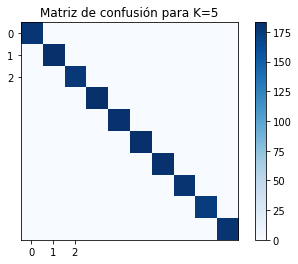

In [8]:
cm  = metrics.confusion_matrix(y, y_pred)
plt.imshow(cm, cmap = plt.cm.Blues)
plt.title("Matriz de confusión para K=5")
plt.colorbar()
tick_marks = np.arange(3)
plt.xticks(tick_marks, digits.target_names)
plt.yticks(tick_marks, digits.target_names)

In [9]:
print(cm)
print("Exactitud: ", metrics.accuracy_score(y, y_pred))

[[178   0   0   0   0   0   0   0   0   0]
 [  0 182   0   0   0   0   0   0   0   0]
 [  0   0 177   0   0   0   0   0   0   0]
 [  0   0   0 183   0   0   0   0   0   0]
 [  0   0   0   0 181   0   0   0   0   0]
 [  0   0   0   0   0 182   0   0   0   0]
 [  0   0   0   0   0   0 181   0   0   0]
 [  0   0   0   0   0   0   0 179   0   0]
 [  0   0   0   0   0   0   0   0 174   0]
 [  0   0   0   0   0   0   0   0   0 180]]
Exactitud:  1.0


In [10]:
metrics.recall_score(y, y_pred, average='weighted')

1.0

In [11]:
metrics.f1_score(y, y_pred, average='weighted')

1.0

In [12]:
metrics.cohen_kappa_score(y, y_pred)

1.0

In [13]:
metrics.precision_score(y, y_pred, average='weighted')

1.0